In [94]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import cv2
import matplotlib.pyplot as plt
from transform import Transform
from PIL import Image

In [92]:
import re
import os

In [3]:
!python generate.py --image_dir sample_folder

/home/nightskies/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
sample_folder
/home/nightskies/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/nightskies/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRC

In [4]:
!ls

anchors.csv  Emile_Male_Dataset  __pycache__	transform.py
dataset.py   generate.py	 sample_folder	Untitled.ipynb


In [5]:
anchors_df = pd.read_csv('anchors.csv')

In [9]:
anchors_df.bboxes.iloc[4]

'[[ 79.483215   90.43543   129.36275   157.3515   ]\n [147.3661     85.60952   212.66064   150.11371  ]\n [ 13.414156   76.42696    78.89861   156.70372  ]\n [ 79.98974    83.85538   142.2327    149.33505  ]\n [ 73.61796    81.63705   145.36809   148.90993  ]\n [ 22.0924    134.83154    46.599434  151.64877  ]\n [ 91.08653    71.148224  216.9315    159.66621  ]\n [ 28.129173   80.4678    122.3555    153.64713  ]\n [149.40923   132.69345   177.17377   157.2805   ]\n [ 24.0575     55.118275  211.22757   151.75073  ]\n [142.5436     79.95575   211.24457   138.79326  ]\n [  4.2948017  78.46843   134.03389   221.7828   ]]'

In [155]:
def prepare_bboxes(bboxes):
    result = bboxes.strip('][').split('\n')
    result[0] = "[" + result[0]
    
    final_bboxes = []
    for res in result:
        res = res.strip("[]").strip(" ")
        res = re.sub(' +', ' ', res)
        res = res.split(" ")
        preprocessed_result = []
        for i in range(len(res)):
            res[i] = res[i].strip("[]")
            if(res[i]!=""):
                preprocessed_result.append(res[i])
        final_bboxes.append(preprocessed_result)
    return final_bboxes

In [117]:
images = []
image_dir = 'sample_folder'
for image in os.listdir(image_dir):
    images.append(tf.transform(Image.open(image_dir + "/" + image)))

In [116]:
tf = Transform()

In [289]:
def show_pred_on_image(img, bboxes, label):
    
    
    img = np.transpose(img.squeeze().numpy(), (1, 2, 0))
    img[img<0] = 0
    img = img*255
    img = img.astype(np.uint8).copy()

    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    idx = 0
    for bbox in bboxes:
        x1 = int(float(bbox[0]))
        y1 = int(float(bbox[1]))
        x2 = int(float(bbox[2]))
        y2 = int(float(bbox[3]))

        cv2.rectangle(img, (x1, y1), (x2, y2), color = (0, 0, 255), thickness = 1)
        cv2.putText(img, labels[int(label[idx])-1], (x1, y1+10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (36,255,12), 1)
        idx+=1
        
    ax.imshow(img)

In [231]:
labels = labels.read().split("\n")

In [229]:
labels = open('coco-labels-2014_2017.txt')

In [288]:
labels

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [292]:
boxes = prepare_bboxes(anchors_df.iloc[4]['bboxes'])

In [293]:
box_labels = anchors_df.iloc[4]['labels'].strip("[]").strip(" ")
box_labels = re.sub(' +', ' ', box_labels)
box_labels = box_labels.split(" ")

In [294]:
box_labels

['1', '1', '1', '62', '3', '3', '1', '1', '3', '1', '62', '1']

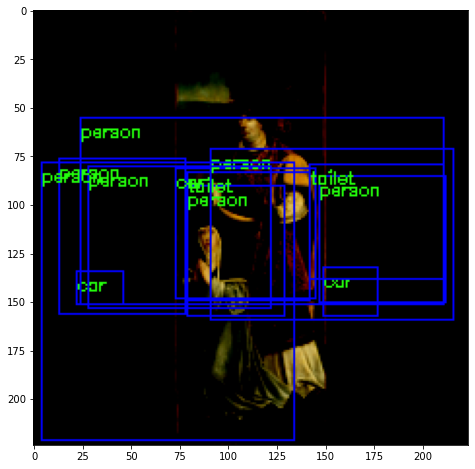

In [299]:
show_pred_on_image(images[2], boxes, box_labels)

In [108]:
images[0].shape

torch.Size([3, 224, 224])

In [202]:
!wget https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt

--2022-07-22 21:56:11--  https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620 [text/plain]
Saving to: ‘coco-labels-2014_2017.txt’

coco-labels-2014_20 100%[===================>]     620  --.-KB/s    in 0s      

2022-07-22 21:56:12 (18.1 MB/s) - ‘coco-labels-2014_2017.txt’ saved [620/620]

